# **사전준비 for colab**
matplotlib 그래프 내 한글 글꼴 표시를 위한 설치 및 런타임 다시 시작과 폰트 설정 작업을 단계별로 수행한다.

## [1] 폰트 설치 (나눔글꼴) 및 폰트매니저 재구성

In [12]:

####  없어도 됨 [폰트개수 확인용]
# 시스템내 최초 설치된 폰트개수 확인 - 처음에는 기본 폰트만 설치됨

import matplotlib.font_manager as fm  # 폰트 관련 용도
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 48
nanum_font number: 31


In [13]:
# 나눔고딕 폰트 설치

!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [14]:
####  없어도 됨 [폰트개수 확인용]
# 설치 후  폰트 개수 확인,  늘어 난 것을 알 수 있다.

import matplotlib.font_manager as fm  # 폰트 관련 용도
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 48
nanum_font number: 31


In [15]:
# 폰트 매니저 재설정을 위한 명령문 수행 : fm._rebuild()
import matplotlib.font_manager as fm
fm._rebuild()

## [2] 폰트 인식을 위한  '런타임 다시시작'
  - '런타임' - '런타임 다시 시작' 
  - 또는 'Ctrl-M'

## [3] 런타임 재시작 이후 
   - 폰트  설정 및 마이너스 부호 오류 처리
   - **시작 이후에는 본 셀 이후 부터 실행한다.**

In [1]:
# 관련 라이브러리 임포트
import matplotlib.font_manager as fm  # 폰트 관련 
import matplotlib.pyplot as plt   # 그래프 내 설정
import matplotlib as mpl  # 기본 설정 

In [2]:
####  없어도 됨 [폰트개수 확인용]
# 런타임 다시 시작 이후, 설치 된 폰트 개수가 증가 한 상태임을 알 수 있다. 
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 48
nanum_font number: 31


In [3]:
# 폰트의 경로를 통해 사용할 폰트 (나눔고딕)를 지정한다.
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 설치된 나눔글꼴중 사용할 폰트의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
# 마이너스 부호 처리에 오류가 있는 경우를 방지 하기 위한 설정
mpl.rcParams['axes.unicode_minus'] = False  

NanumGothic


# **0. 지난 시간 복습**

## 0.1 데이터 수집

### 판다스 라이브러리 불러오기

**# import**

In [4]:
# 판다스 라이브러리 불러오기

import pandas as pd

### 데이터 프레임 생성하기 : CVS 파일 읽어오기

**# pd.read_csv**

In [5]:
# 깃허브에서 CSV 파일을 읽어 데이터프레임을 생성한다.

corona = pd.read_csv('https://github.com/sagelab4data/first_da_2021_1/blob/main/Day02_corona_cases_local.csv?raw=true', 
                     encoding='euc-kr')
corona

,상태별,2020. 04. 01,2020. 04. 02,2020. 04. 03,2020. 04. 04,2020. 04. 05,2020. 04. 06,2020. 04. 07,2020. 04. 08,2020. 04. 09,2020. 04. 10,2020. 04. 11,2020. 04. 12,2020. 04. 13,2020. 04. 14,2020. 04. 15,2020. 04. 16,2020. 04. 17,2020. 04. 18,2020. 04. 19,2020. 04. 20,2020. 04. 21,2020. 04. 22,2020. 04. 23,2020. 04. 24,2020. 04. 25,2020. 04. 26,2020. 04. 27,2020. 04. 28,2020. 04. 29,2020. 04. 30,2020. 05. 01,2020. 05. 02,2020. 05. 03,2020. 05. 04,2020. 05. 05,2020. 05. 06,2020. 05. 07,2020. 05. 08,2020. 05. 09,...,2021. 02. 15,2021. 02. 16,2021. 02. 17,2021. 02. 18,2021. 02. 19,2021. 02. 20,2021. 02. 21,2021. 02. 22,2021. 02. 23,2021. 02. 24,2021. 02. 25,2021. 02. 26,2021. 02. 27,2021. 02. 28,2021. 03. 01,2021. 03. 02,2021. 03. 03,2021. 03. 04,2021. 03. 05,2021. 03. 06,2021. 03. 07,2021. 03. 08,2021. 03. 09,2021. 03. 10,2021. 03. 11,2021. 03. 12,2021. 03. 13,2021. 03. 14,2021. 03. 15,2021. 03. 16,2021. 03. 17,2021. 03. 18,2021. 03. 19,2021. 03. 20,2021. 03. 21,2021. 03. 22,2021. 03. 23,2021. 03. 24,2021. 03. 25,2021. 03. 26
0,해외유입,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,5,12,24,16,12,11,11,14,9,5,7,5,6,4,2,4,9,7,12,5,4,8,6,10,8,3,2,3,11,1,...,21,28,31,31,28,32,25,19,27,23,27,24,10,22,17,25,18,23,17,14,17,11,19,18,21,21,16,23,12,18,17,18,22,12,19,19,15,17,11,23
1,국내발생,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,22,18,8,9,15,16,11,8,9,3,6,4,5,4,4,6,1,3,2,4,0,1,0,3,0,0,0,1,1,17,...,322,429,590,590,533,416,391,313,330,417,369,382,405,334,338,319,426,401,381,404,399,335,427,452,444,467,474,436,370,345,452,427,441,440,437,396,331,411,419,471
2,신규,101.0,89.0,86.0,94.0,81.0,47.0,47.0,53.0,39,27,30,32,25,27,27,22,22,18,8,13,9,11,8,6,10,10,10,14,9,4,9,6,13,8,3,2,4,12,18,...,343,457,621,621,561,448,416,332,357,440,396,406,415,356,355,344,444,424,398,418,416,346,446,470,465,488,490,459,382,363,469,445,463,452,456,415,346,428,430,494


## 0.2 데이터 가공

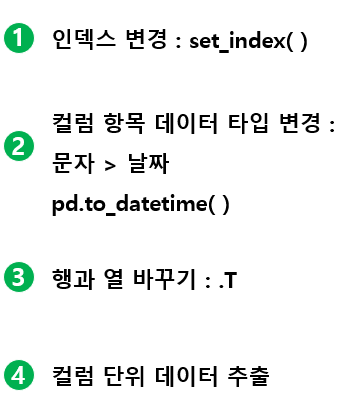

### 인덱스 변경

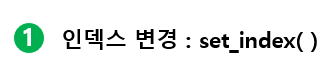

**# set_index('상태별')**

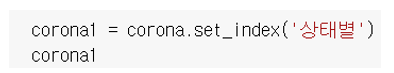

In [6]:
# 상태별 항목을 인덱스로 지정하고 corona1 변수에 저장한다

corona1 = corona.set_index('상태별')
corona1

,2020. 04. 01,2020. 04. 02,2020. 04. 03,2020. 04. 04,2020. 04. 05,2020. 04. 06,2020. 04. 07,2020. 04. 08,2020. 04. 09,2020. 04. 10,2020. 04. 11,2020. 04. 12,2020. 04. 13,2020. 04. 14,2020. 04. 15,2020. 04. 16,2020. 04. 17,2020. 04. 18,2020. 04. 19,2020. 04. 20,2020. 04. 21,2020. 04. 22,2020. 04. 23,2020. 04. 24,2020. 04. 25,2020. 04. 26,2020. 04. 27,2020. 04. 28,2020. 04. 29,2020. 04. 30,2020. 05. 01,2020. 05. 02,2020. 05. 03,2020. 05. 04,2020. 05. 05,2020. 05. 06,2020. 05. 07,2020. 05. 08,2020. 05. 09,2020. 05. 10,...,2021. 02. 15,2021. 02. 16,2021. 02. 17,2021. 02. 18,2021. 02. 19,2021. 02. 20,2021. 02. 21,2021. 02. 22,2021. 02. 23,2021. 02. 24,2021. 02. 25,2021. 02. 26,2021. 02. 27,2021. 02. 28,2021. 03. 01,2021. 03. 02,2021. 03. 03,2021. 03. 04,2021. 03. 05,2021. 03. 06,2021. 03. 07,2021. 03. 08,2021. 03. 09,2021. 03. 10,2021. 03. 11,2021. 03. 12,2021. 03. 13,2021. 03. 14,2021. 03. 15,2021. 03. 16,2021. 03. 17,2021. 03. 18,2021. 03. 19,2021. 03. 20,2021. 03. 21,2021. 03. 22,2021. 03. 23,2021. 03. 24,2021. 03. 25,2021. 03. 26
상태별,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
해외유입,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,5,12,24,16,12,11,11,14,9,5,7,5,6,4,2,4,9,7,12,5,4,8,6,10,8,3,2,3,11,1,8,...,21,28,31,31,28,32,25,19,27,23,27,24,10,22,17,25,18,23,17,14,17,11,19,18,21,21,16,23,12,18,17,18,22,12,19,19,15,17,11,23
국내발생,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,22,18,8,9,15,16,11,8,9,3,6,4,5,4,4,6,1,3,2,4,0,1,0,3,0,0,0,1,1,17,26,...,322,429,590,590,533,416,391,313,330,417,369,382,405,334,338,319,426,401,381,404,399,335,427,452,444,467,474,436,370,345,452,427,441,440,437,396,331,411,419,471
신규,101.0,89.0,86.0,94.0,81.0,47.0,47.0,53.0,39,27,30,32,25,27,27,22,22,18,8,13,9,11,8,6,10,10,10,14,9,4,9,6,13,8,3,2,4,12,18,34,...,343,457,621,621,561,448,416,332,357,440,396,406,415,356,355,344,444,424,398,418,416,346,446,470,465,488,490,459,382,363,469,445,463,452,456,415,346,428,430,494


### 컬럼 항목 데이터 타입 변경

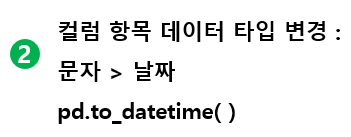

In [7]:
# 컬럼 항목을 조회해 본다.

corona1.columns

Index(['2020. 04. 01', '2020. 04. 02', '2020. 04. 03', '2020. 04. 04',
       '2020. 04. 05', '2020. 04. 06', '2020. 04. 07', '2020. 04. 08',
       '2020. 04. 09', '2020. 04. 10',
       ...
       '2021. 03. 17', '2021. 03. 18', '2021. 03. 19', '2021. 03. 20',
       '2021. 03. 21', '2021. 03. 22', '2021. 03. 23', '2021. 03. 24',
       '2021. 03. 25', '2021. 03. 26'],
      dtype='object', length=360)

**# pd.to_datetime( )**

In [8]:
# pd.to_datetime 명령어를 이용해 컬럼의 문자를 날짜형 자료형으로 변경한다. 

corona1.columns = pd.to_datetime(corona1.columns)
corona1.columns

DatetimeIndex(['2020-04-01', '2020-04-02', '2020-04-03', '2020-04-04',
               '2020-04-05', '2020-04-06', '2020-04-07', '2020-04-08',
               '2020-04-09', '2020-04-10',
               ...
               '2021-03-17', '2021-03-18', '2021-03-19', '2021-03-20',
               '2021-03-21', '2021-03-22', '2021-03-23', '2021-03-24',
               '2021-03-25', '2021-03-26'],
              dtype='datetime64[ns]', length=360, freq=None)

### 행과 열 바꾸기

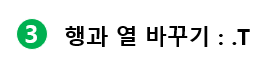

**# corona1.T**

In [9]:
# Transpose (T) 명령을 사용하여 행과 열을 바꾸고 corona2라는 변수에 저장한다

corona2 = corona1.T
corona2

상태별,해외유입,국내발생,신규
2020-04-01,NaN,NaN,101.0
2020-04-02,NaN,NaN,89.0
2020-04-03,NaN,NaN,86.0
2020-04-04,NaN,NaN,94.0
2020-04-05,NaN,NaN,81.0
...,...,...,...
2021-03-22,19.0,396.0,415.0
2021-03-23,15.0,331.0,346.0
2021-03-24,17.0,411.0,428.0
2021-03-25,11.0,419.0,430.0


### 컬럼 단위 데이터 추출하기

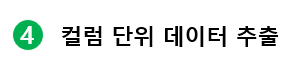

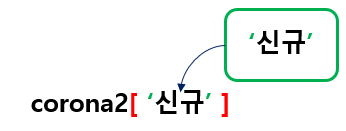

In [13]:
# 컬럼 단위 데이터를 추출하고 corona_new 변수에 저장한다

corona_new = corona2['신규']
corona_new

2020-04-01    101.0
2020-04-02     89.0
2020-04-03     86.0
2020-04-04     94.0
2020-04-05     81.0
              ...  
2021-03-22    415.0
2021-03-23    346.0
2021-03-24    428.0
2021-03-25    430.0
2021-03-26    494.0
Name: 신규, Length: 360, dtype: float64

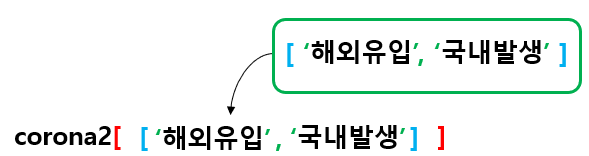

In [14]:
# 해외유입, 국내발생 두 개의 열을 추출한 후, 결과를 corona_cause 변수에 저장한다. .

corona_cause = corona2[['해외유입', '국내발생']]
corona_cause

상태별,해외유입,국내발생
2020-04-01,NaN,NaN
2020-04-02,NaN,NaN
2020-04-03,NaN,NaN
2020-04-04,NaN,NaN
2020-04-05,NaN,NaN
...,...,...
2021-03-22,19.0,396.0
2021-03-23,15.0,331.0
2021-03-24,17.0,411.0
2021-03-25,11.0,419.0


# **1. 신규 확진자 분석**

## 1.1 데이터 수집

In [16]:
# 지난 시간 복습 단계에서 열 단위로 데이터를 추출한 '신규' 확진자를 조회해본다.

corona_new

2020-04-01    101.0
2020-04-02     89.0
2020-04-03     86.0
2020-04-04     94.0
2020-04-05     81.0
              ...  
2021-03-22    415.0
2021-03-23    346.0
2021-03-24    428.0
2021-03-25    430.0
2021-03-26    494.0
Name: 신규, Length: 360, dtype: float64

## 1.2 데이터 가공

### 행 단위 데이터 추출하기

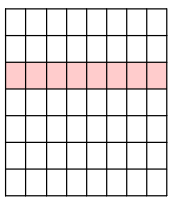

**# df.loc[  ]**

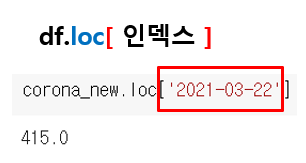

In [17]:
# loc 명령을 사용하여 행 단위 데이터를 추출 조회해 본다.

corona_new.loc['2021-03-22']

415.0

In [18]:
# loc 명령을 계속 연습한다.

corona_new.loc['2020-10-27']

88.0

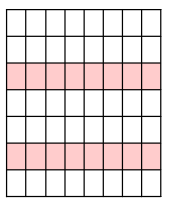

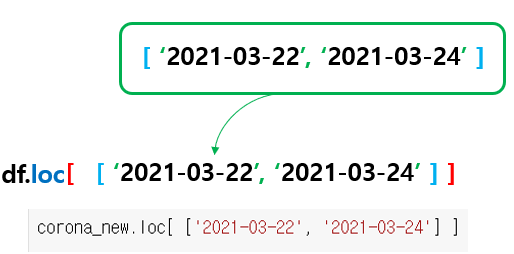

In [19]:
# loc 명령을 사용해서 두 개 이상의 행을 추출해 본다.

corona_new.loc[ ['2021-03-22', '2021-03-24'] ]

2021-03-22    415.0
2021-03-24    428.0
Name: 신규, dtype: float64

### 슬라이싱

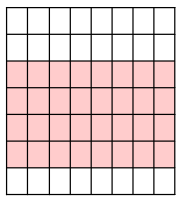

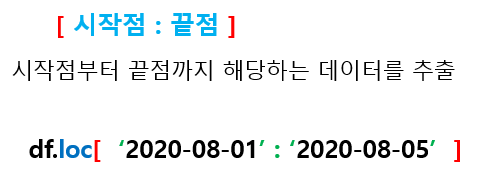

In [20]:
# 슬라이싱 개념을 적용하여 데이터를 조회한다.

corona_new.loc['2020-08-01':'2020-08-05']

2020-08-01    31.0
2020-08-02    30.0
2020-08-03    23.0
2020-08-04    34.0
2020-08-05    33.0
Name: 신규, dtype: float64

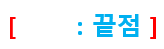

In [21]:
# 시작점을 생략한 경우
# 시작점 대신 데이터프레임의 제일 첫번째 데이터를 기본값으로 적용한다.
# corona_new 데이터프레임의 첫 데이터는 2020년 4월 1일 데이터

corona_new.loc[ : '2020-12-31']

2020-04-01     101.0
2020-04-02      89.0
2020-04-03      86.0
2020-04-04      94.0
2020-04-05      81.0
               ...  
2020-12-27     970.0
2020-12-28     807.0
2020-12-29    1045.0
2020-12-30    1050.0
2020-12-31     967.0
Name: 신규, Length: 275, dtype: float64

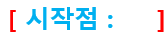

In [22]:
# 끝점을 생략한 경우
# 끝점 대신 데이터프레임의 제일 마지막 데이터를 기본값으로 적용한다.
# corona_new 데이터프레임의 마지막 데이터는 2021년 3월 26일 데이터


corona_new.loc['2021-01-01' : ]

2021-01-01    1029.0
2021-01-02     824.0
2021-01-03     657.0
2021-01-04    1020.0
2021-01-05     715.0
               ...  
2021-03-22     415.0
2021-03-23     346.0
2021-03-24     428.0
2021-03-25     430.0
2021-03-26     494.0
Name: 신규, Length: 85, dtype: float64

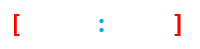

In [23]:
# 시작점과 끝점을 모두 생략한 경우
# 시작점 대신 데이터프레임의 제일 첫 데이터, 끝점 대신 마지막 데이터를 기본값으로 적용한다.
# corona_new 첫 데이터는 2020년 4월 1일, 마지막 데이터는 2021년 3월 26일 데이터

corona_new[ : ]

2020-04-01    101.0
2020-04-02     89.0
2020-04-03     86.0
2020-04-04     94.0
2020-04-05     81.0
              ...  
2021-03-22    415.0
2021-03-23    346.0
2021-03-24    428.0
2021-03-25    430.0
2021-03-26    494.0
Name: 신규, Length: 360, dtype: float64

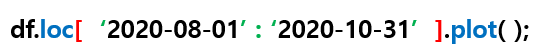

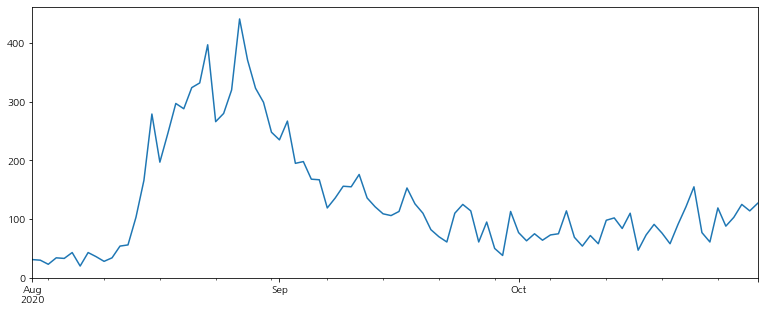

In [24]:
# 슬라이싱해서 추출한 결과 데이터로 그래프를 작성해 본다.

corona_new.loc['2020-08-01':'2020-10-31'].plot(figsize=(13,5));

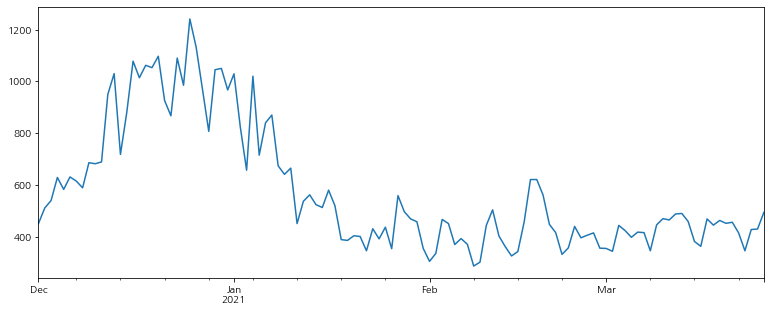

In [25]:
# 날짜 인덱스를 바꿔가며 자유롭게 연습해보세요

corona_new.loc[ '2020-12-01' :].plot(figsize=(13,5));

### 컬럼 데이터 추가


corona_new 데이터프레임에 확진자가 발생한 날짜의 연, 월, 일 데이터를 새 컬럼으로 추가하고자 함


1.   시리즈인 corona_new를 to_frame( ) 명령으로 데이터프레임으로 변환
2.   날짜 인덱스를 활용하여 확진자가 발생한 날짜의 연, 월, 일을 조회
3.   연, 월, 일 데이터를 새 컬럼으로 추가



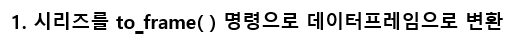

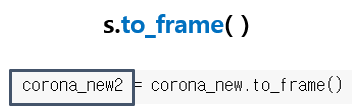

In [26]:
# 시리즈를 데이터프레임으로 변환하고 corona_new2 라는 변수에 저장한다.

corona_new2 = corona_new.to_frame()
corona_new2.head()

,신규
2020-04-01,101.0
2020-04-02,89.0
2020-04-03,86.0
2020-04-04,94.0
2020-04-05,81.0


In [27]:
# corona_new의 타입은 시리즈

type(corona_new)

pandas.core.series.Series

In [28]:
# corona_new2의 타입은 데이터프레임

type(corona_new2)

pandas.core.frame.DataFrame

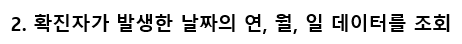

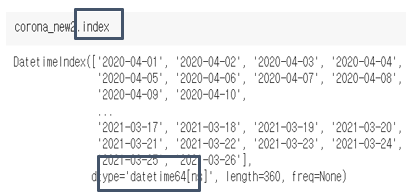

In [29]:
# corona_new2의 인덱스가 날짜 데이터 타입인 것을 확인

corona_new2.index

DatetimeIndex(['2020-04-01', '2020-04-02', '2020-04-03', '2020-04-04',
               '2020-04-05', '2020-04-06', '2020-04-07', '2020-04-08',
               '2020-04-09', '2020-04-10',
               ...
               '2021-03-17', '2021-03-18', '2021-03-19', '2021-03-20',
               '2021-03-21', '2021-03-22', '2021-03-23', '2021-03-24',
               '2021-03-25', '2021-03-26'],
              dtype='datetime64[ns]', length=360, freq=None)

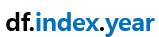

In [30]:
# index.year 명령을 통해 확진자가 발생한 날짜의 연도 데이터를 확인
# 2020년과 2021년 연도를 조회

corona_new2.index.year

Int64Index([2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020,
            ...
            2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021],
           dtype='int64', length=360)

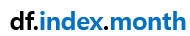

In [31]:
# index.month 명령을 통해 확진자가 발생한 날짜의 월 데이터를 확인
# (2020년) 4월부터 (2021년) 3월

corona_new2.index.month

Int64Index([4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
            ...
            3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
           dtype='int64', length=360)

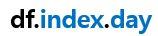

In [32]:
# index.day 명령을 통해 확진자가 발생한 날짜의 일 데이터를 확인
# (2020년 4월) 1일부터 (2021년 3월) 26일

corona_new2.index.day

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26],
           dtype='int64', length=360)

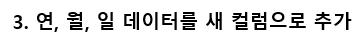

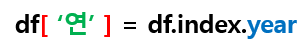

In [33]:
# 연도 데이터를 '연'이라는 컬럼으로 추가
# 새 컬럼이 추가된 것을 확인

corona_new2['연'] = corona_new2.index.year
corona_new2

,신규,연
2020-04-01,101.0,2020
2020-04-02,89.0,2020
2020-04-03,86.0,2020
2020-04-04,94.0,2020
2020-04-05,81.0,2020
...,...,...
2021-03-22,415.0,2021
2021-03-23,346.0,2021
2021-03-24,428.0,2021
2021-03-25,430.0,2021


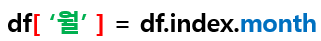

In [34]:
# 월 데이터를 '월'이라는 컬럼으로 추가
# 새 컬럼이 추가된 것을 확인


corona_new2['월'] = corona_new2.index.month
corona_new2

,신규,연,월
2020-04-01,101.0,2020,4
2020-04-02,89.0,2020,4
2020-04-03,86.0,2020,4
2020-04-04,94.0,2020,4
2020-04-05,81.0,2020,4
...,...,...,...
2021-03-22,415.0,2021,3
2021-03-23,346.0,2021,3
2021-03-24,428.0,2021,3
2021-03-25,430.0,2021,3


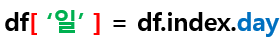

In [35]:
# 일 데이터를 '일'이라는 컬럼으로 추가
# 새 컬럼이 추가된 것을 확인

corona_new2['일'] = corona_new2.index.day
corona_new2

,신규,연,월,일
2020-04-01,101.0,2020,4,1
2020-04-02,89.0,2020,4,2
2020-04-03,86.0,2020,4,3
2020-04-04,94.0,2020,4,4
2020-04-05,81.0,2020,4,5
...,...,...,...,...
2021-03-22,415.0,2021,3,22
2021-03-23,346.0,2021,3,23
2021-03-24,428.0,2021,3,24
2021-03-25,430.0,2021,3,25


### 피봇

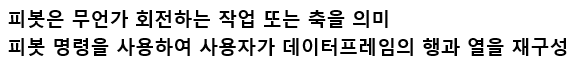

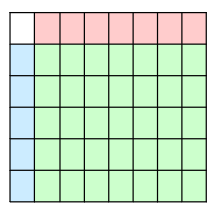

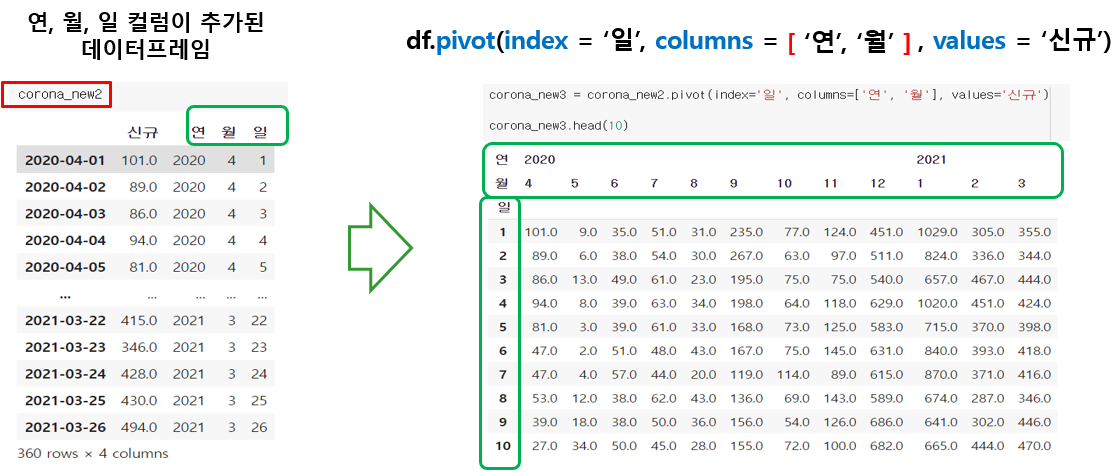

In [36]:
# corona_new2 데이터프레임에서 새로 추가된 연, 월, 일 컬럼을 조회해 본다.

corona_new2.head()

,신규,연,월,일
2020-04-01,101.0,2020,4,1
2020-04-02,89.0,2020,4,2
2020-04-03,86.0,2020,4,3
2020-04-04,94.0,2020,4,4
2020-04-05,81.0,2020,4,5


In [37]:
# 새로 추가된 컬럼인 '일'을 인덱스로, '월'을 컬럼으로, '신규'를 값 = Value로 피봇을 적용해본다.

corona_new2.pivot(index = '일', columns = '월', values = '신규').head(10)

월,1,2,3,4,5,6,7,8,9,10,11,12
일,,,,,,,,,,,,
1,1029.0,305.0,355.0,101.0,9.0,35.0,51.0,31.0,235.0,77.0,124.0,451.0
2,824.0,336.0,344.0,89.0,6.0,38.0,54.0,30.0,267.0,63.0,97.0,511.0
3,657.0,467.0,444.0,86.0,13.0,49.0,61.0,23.0,195.0,75.0,75.0,540.0
4,1020.0,451.0,424.0,94.0,8.0,39.0,63.0,34.0,198.0,64.0,118.0,629.0
5,715.0,370.0,398.0,81.0,3.0,39.0,61.0,33.0,168.0,73.0,125.0,583.0
6,840.0,393.0,418.0,47.0,2.0,51.0,48.0,43.0,167.0,75.0,145.0,631.0
7,870.0,371.0,416.0,47.0,4.0,57.0,44.0,20.0,119.0,114.0,89.0,615.0
8,674.0,287.0,346.0,53.0,12.0,38.0,62.0,43.0,136.0,69.0,143.0,589.0
9,641.0,302.0,446.0,39.0,18.0,38.0,50.0,36.0,156.0,54.0,126.0,686.0


In [38]:
# 새로 추가된 '일'을 인덱스로, '연'과 '월'을 피봇의 컬럼으로, '신규 확진자 수'를 피봇의 값으로 지정한다.
# 결과를 corona_new3라는 새로운 변수에 저장한다.

corona_new3 = corona_new2.pivot(index='일', columns=['연', '월'], values='신규')
corona_new3.head()

연   2020                          ...                  2021              
월     4     5     6     7     8   ...     11     12      1      2      3 
일                                 ...                                    
1  101.0   9.0  35.0  51.0  31.0  ...  124.0  451.0  1029.0  305.0  355.0
2   89.0   6.0  38.0  54.0  30.0  ...   97.0  511.0   824.0  336.0  344.0
3   86.0  13.0  49.0  61.0  23.0  ...   75.0  540.0   657.0  467.0  444.0
4   94.0   8.0  39.0  63.0  34.0  ...  118.0  629.0  1020.0  451.0  424.0
5   81.0   3.0  39.0  61.0  33.0  ...  125.0  583.0   715.0  370.0  398.0

[5 rows x 12 columns]

## 1.3 데이터 모델링 및 시각화

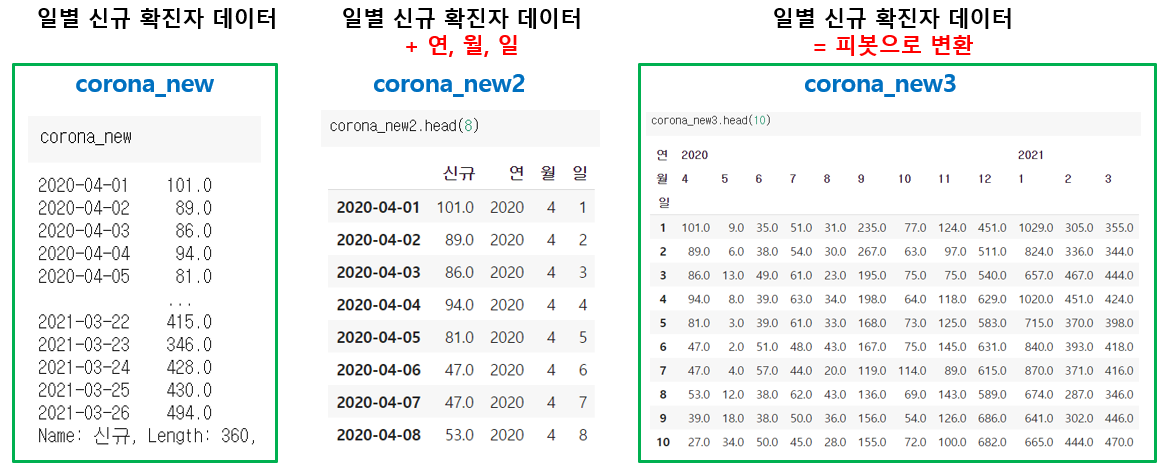

### 합계 - sum( ) 및 cumsum( )

In [39]:
# 코로나 데이터를 조회한다.

corona_new

2020-04-01    101.0
2020-04-02     89.0
2020-04-03     86.0
2020-04-04     94.0
2020-04-05     81.0
              ...  
2021-03-22    415.0
2021-03-23    346.0
2021-03-24    428.0
2021-03-25    430.0
2021-03-26    494.0
Name: 신규, Length: 360, dtype: float64

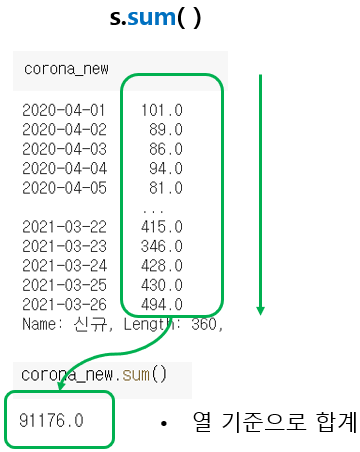

In [40]:
# 코로나 데이터를 합산한다.

corona_new.sum()

91176.0

In [41]:
# 코로나 데이터를 누적 합산한다.

corona_new.cumsum()

2020-04-01      101.0
2020-04-02      190.0
2020-04-03      276.0
2020-04-04      370.0
2020-04-05      451.0
               ...   
2021-03-22    89478.0
2021-03-23    89824.0
2021-03-24    90252.0
2021-03-25    90682.0
2021-03-26    91176.0
Name: 신규, Length: 360, dtype: float64

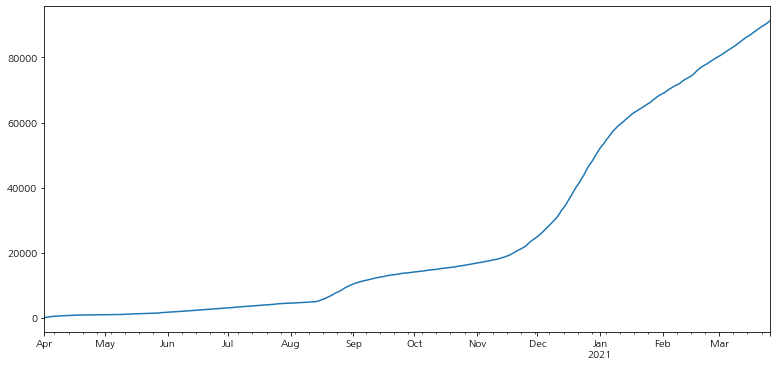

In [42]:
# 누적 합산한 데이터를 그래프로 작성한다.

corona_new.cumsum().plot(figsize=(13, 6));

### 막대 그래프

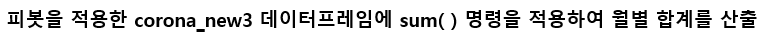

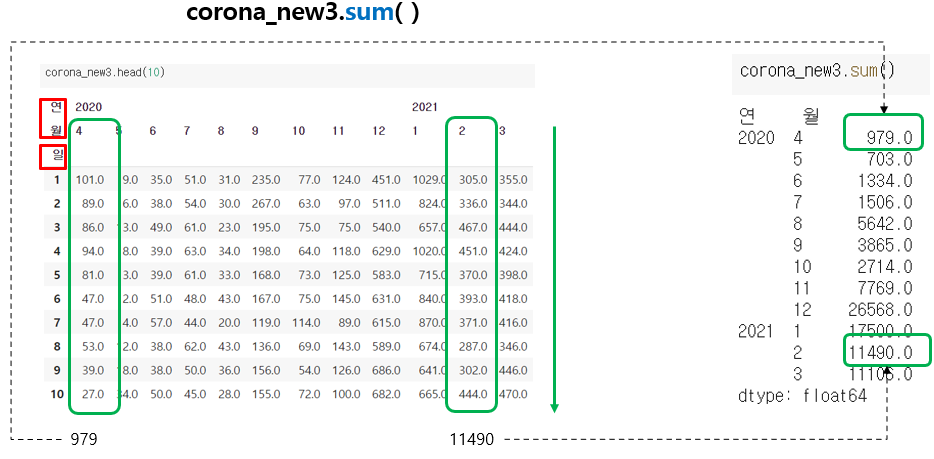

In [43]:
corona_new3.head()

연   2020                          ...                  2021              
월     4     5     6     7     8   ...     11     12      1      2      3 
일                                 ...                                    
1  101.0   9.0  35.0  51.0  31.0  ...  124.0  451.0  1029.0  305.0  355.0
2   89.0   6.0  38.0  54.0  30.0  ...   97.0  511.0   824.0  336.0  344.0
3   86.0  13.0  49.0  61.0  23.0  ...   75.0  540.0   657.0  467.0  444.0
4   94.0   8.0  39.0  63.0  34.0  ...  118.0  629.0  1020.0  451.0  424.0
5   81.0   3.0  39.0  61.0  33.0  ...  125.0  583.0   715.0  370.0  398.0

[5 rows x 12 columns]

In [44]:
corona_new3.sum()

연     월 
2020  4       979.0
      5       703.0
      6      1334.0
      7      1506.0
      8      5642.0
      9      3865.0
      10     2714.0
      11     7769.0
      12    26568.0
2021  1     17500.0
      2     11490.0
      3     11106.0
dtype: float64

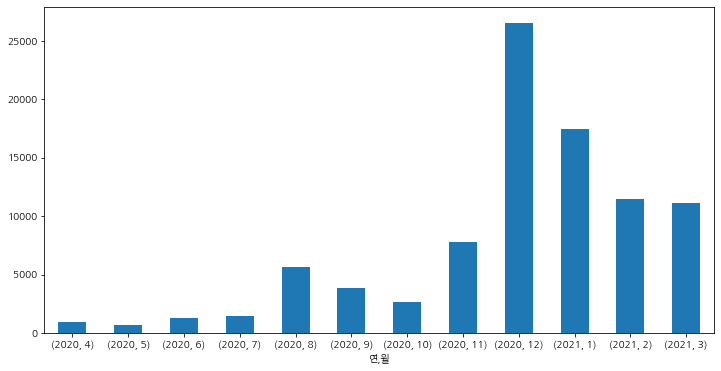

In [45]:
corona_new3.sum().plot(kind = 'bar', figsize = (12, 6), rot = 0);

### 상자 그래프

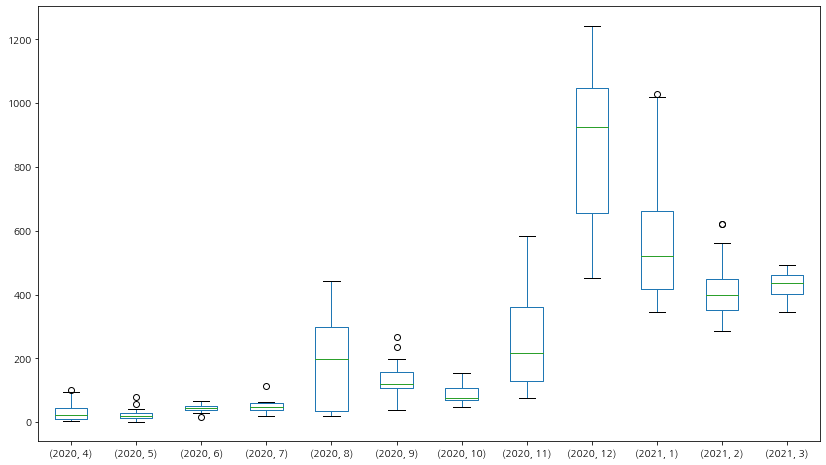

In [47]:
# 버전 이슈
import numpy as np
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)


# 새로 피봇 적용된 결과를 상자 그래프를 작성해 본다.
corona_new3.plot(kind='box', figsize=(14, 8));

# **2. 발생 경로별 확진자 분석**

## 2.1 데이터 수집

In [48]:
# 발생경로별 확진자 데이터를 조회한다.

corona_cause

상태별,해외유입,국내발생
2020-04-01,NaN,NaN
2020-04-02,NaN,NaN
2020-04-03,NaN,NaN
2020-04-04,NaN,NaN
2020-04-05,NaN,NaN
...,...,...
2021-03-22,19.0,396.0
2021-03-23,15.0,331.0
2021-03-24,17.0,411.0
2021-03-25,11.0,419.0


## 2.2 데이터 가공

### 누락값 처리

In [49]:
# 누락값을 제거하고 새 변수에 저장한다.

corona_cause2 = corona_cause.dropna()
corona_cause2

상태별,해외유입,국내발생
2020-04-09,23.0,16.0
2020-04-10,5.0,22.0
2020-04-11,12.0,18.0
2020-04-12,24.0,8.0
2020-04-13,16.0,9.0
...,...,...
2021-03-22,19.0,396.0
2021-03-23,15.0,331.0
2021-03-24,17.0,411.0
2021-03-25,11.0,419.0


## 2.3 데이터 모델링 및 시각화

### 꺾은선 그래프

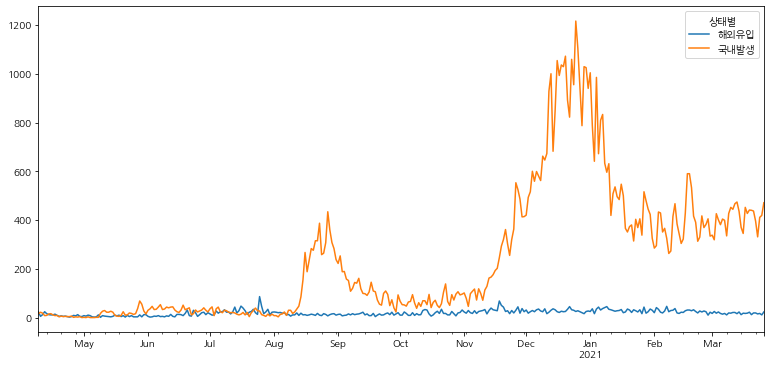

In [50]:
# 발생경로별 꺾은선 그래프를 작성해 본다.

corona_cause2.plot(figsize=(13, 6));

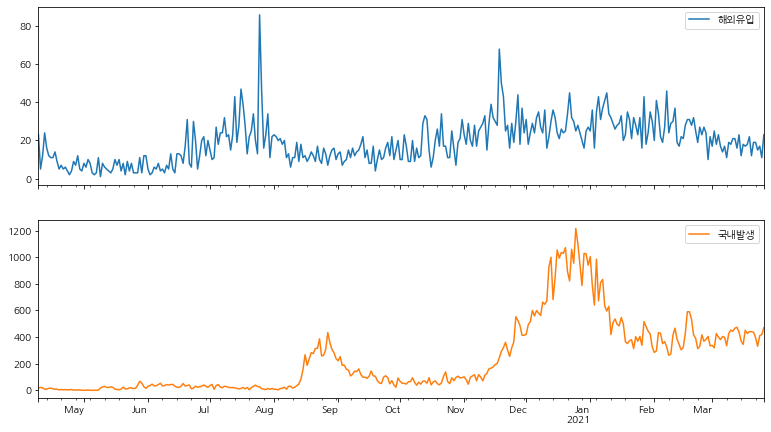

In [51]:
# 서브플롯을 적용하여 그래프를 구분하여 작성해 본다.

corona_cause2.plot(figsize=(13, 8), subplots=True, rot=0);

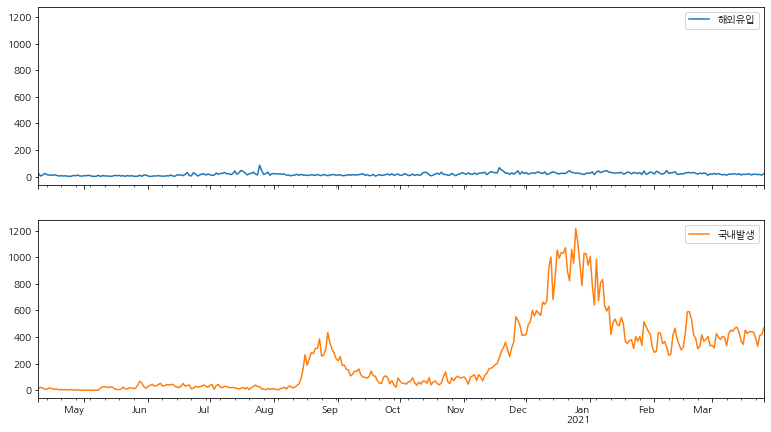

In [55]:
# sharey 를 적용하여 공통의 y축을 적용한다.

corona_cause2.plot(figsize=(13, 8), subplots=True, rot=0, sharey=True);

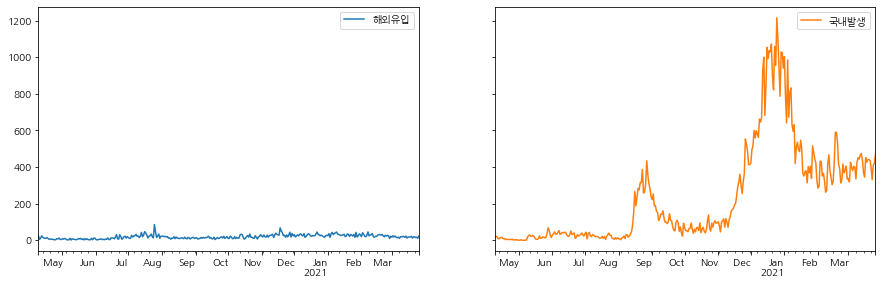

In [56]:
# layout을 적용하여 그래프를 구분하여 작성한다.

corona_cause2.plot(figsize=(15,5), subplots=True, rot=0, sharey=True, layout=(1, 2));

### 막대 그래프

In [57]:
corona_cause2.tail(90)

상태별,해외유입,국내발생
2020-12-27,24.0,946.0
2020-12-28,20.0,787.0
2020-12-29,16.0,1029.0
2020-12-30,25.0,1025.0
2020-12-31,27.0,940.0
...,...,...
2021-03-22,19.0,396.0
2021-03-23,15.0,331.0
2021-03-24,17.0,411.0
2021-03-25,11.0,419.0


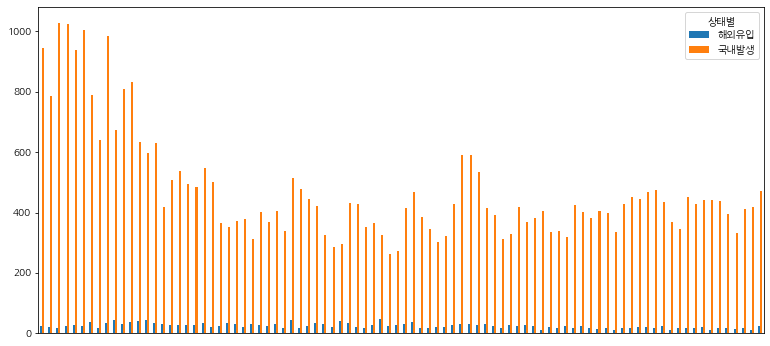

In [59]:
corona_cause2.tail(90).plot( kind = 'bar', figsize = (13, 6), xticks=[]);

# **3. 심화 학습 (1) - 발생 경로별**

## 3.1 데이터 모델링 및 시각화

### 합계 - sum( )

In [60]:
# 누락값을 제거한 발생경로별 데이터를 조회한다.

corona_cause2.head()

상태별,해외유입,국내발생
2020-04-09,23.0,16.0
2020-04-10,5.0,22.0
2020-04-11,12.0,18.0
2020-04-12,24.0,8.0
2020-04-13,16.0,9.0


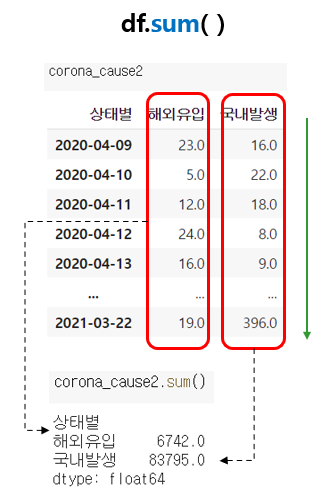

In [61]:
# 발생경로별 합계를 산출한다.

corona_cause2.sum()

상태별
해외유입     6742.0
국내발생    83795.0
dtype: float64

### 원 그래프

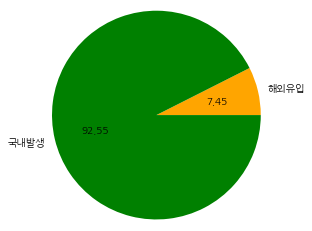

In [62]:
# 발생경로별 합계를 원 그래프로 그려본다.

corona_cause2.sum().plot(kind='pie', radius=1.2, autopct='%.2f', colors=['orange', 'green'], ylabel='', );

# **4. 심화 학습 (2) - 지역별**

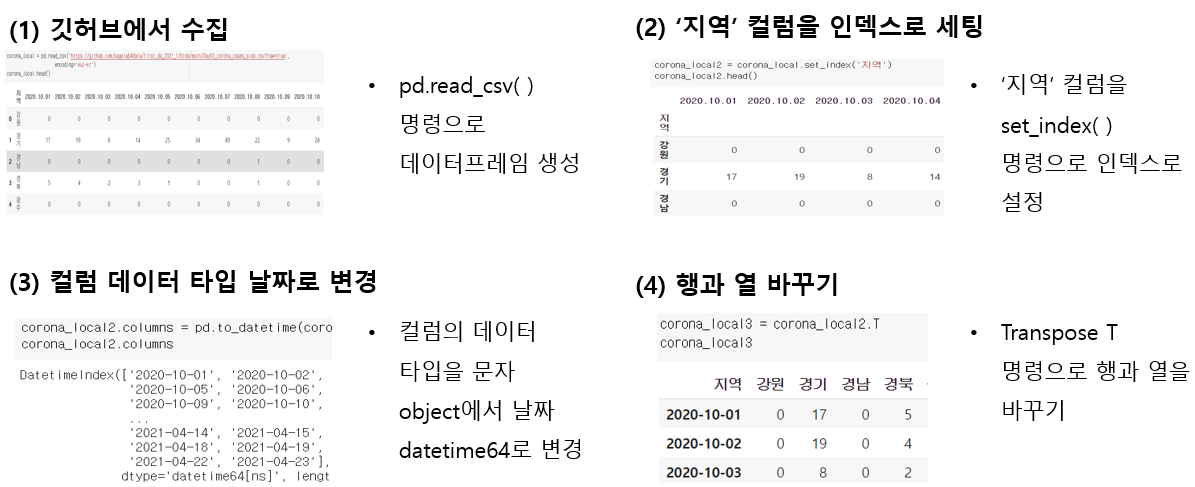

## 4.1 데이터 수집

In [72]:
# 지역별 확진자 데이터를 깃허브에서 수집한 후 데이터프레임을 생성한다.
# corona_local 이름의 변수에 저장한다.

corona_local = pd.read_csv('https://github.com/sagelab4data/first_da_2021_1/blob/main/Day03_corona_cases_sido.csv?raw=true', 
                     encoding='euc-kr')
corona_local.head()

,지역,2020.10.01,2020.10.02,2020.10.03,2020.10.04,2020.10.05,2020.10.06,2020.10.07,2020.10.08,2020.10.09,2020.10.10,2020.10.11,2020.10.12,2020.10.13,2020.10.14,2020.10.15,2020.10.16,2020.10.17,2020.10.18,2020.10.19,2020.10.20,2020.10.21,2020.10.22,2020.10.23,2020.10.24,2020.10.25,2020.10.26,2020.10.27,2020.10.28,2020.10.29,2020.10.30,2020.10.31,2020.11.01,2020.11.02,2020.11.03,2020.11.04,2020.11.05,2020.11.06,2020.11.07,2020.11.08,...,2021.03.15,2021.03.16,2021.03.17,2021.03.18,2021.03.19,2021.03.20,2021.03.21,2021.03.22,2021.03.23,2021.03.24,2021.03.25,2021.03.26,2021.03.27,2021.03.28,2021.03.29,2021.03.30,2021.03.31,2021.04.01,2021.04.02,2021.04.03,2021.04.04,2021.04.05,2021.04.06,2021.04.07,2021.04.08,2021.04.09,2021.04.10,2021.04.11,2021.04.12,2021.04.13,2021.04.14,2021.04.15,2021.04.16,2021.04.17,2021.04.18,2021.04.19,2021.04.20,2021.04.21,2021.04.22,2021.04.23
0,강원,0,0,0,0,0,0,0,0,0,0,2,1,4,0,1,0,3,1,1,2,0,2,1,0,0,0,6,14,7,6,0,3,0,1,0,1,7,4,9,...,10,12,10,23,30,17,13,21,9,18,27,24,35,19,6,13,16,20,10,16,6,14,15,16,6,3,6,5,4,12,6,18,7,11,19,21,18,14,23,15
1,경기,17,19,8,14,25,34,49,22,9,24,18,17,32,15,6,15,32,48,15,22,21,62,98,32,27,65,27,28,52,23,23,36,40,15,41,23,34,16,23,...,161,146,182,155,153,187,155,143,120,150,147,187,141,150,130,112,106,125,156,143,146,108,100,173,223,197,199,182,173,163,238,222,216,204,181,142,184,225,217,290
2,경남,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,3,5,3,0,0,1,2,0,0,0,5,13,5,5,...,31,64,45,35,42,31,54,37,29,27,30,37,19,13,18,15,21,21,18,28,13,11,7,25,10,15,44,15,15,15,27,22,44,36,67,35,29,40,58,63
3,경북,5,4,2,3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,2,...,3,4,4,5,4,11,5,10,19,12,9,12,10,7,3,4,6,6,28,16,13,20,25,9,11,7,26,12,15,10,14,19,23,28,26,17,20,15,23,22
4,광주,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,4,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,2,...,1,1,0,0,2,0,2,2,1,2,4,2,5,2,2,1,2,1,1,2,4,0,6,2,0,5,1,0,4,9,5,3,10,4,12,11,4,17,9,16


## 3.2 데이터 가공

### 인덱스 변경

In [76]:
# 인덱스를 '구분별' 항목으로 변경한다.

corona_local2 = corona_local.set_index('지역')
corona_local2.head()

,2020.10.01,2020.10.02,2020.10.03,2020.10.04,2020.10.05,2020.10.06,2020.10.07,2020.10.08,2020.10.09,2020.10.10,2020.10.11,2020.10.12,2020.10.13,2020.10.14,2020.10.15,2020.10.16,2020.10.17,2020.10.18,2020.10.19,2020.10.20,2020.10.21,2020.10.22,2020.10.23,2020.10.24,2020.10.25,2020.10.26,2020.10.27,2020.10.28,2020.10.29,2020.10.30,2020.10.31,2020.11.01,2020.11.02,2020.11.03,2020.11.04,2020.11.05,2020.11.06,2020.11.07,2020.11.08,2020.11.09,...,2021.03.15,2021.03.16,2021.03.17,2021.03.18,2021.03.19,2021.03.20,2021.03.21,2021.03.22,2021.03.23,2021.03.24,2021.03.25,2021.03.26,2021.03.27,2021.03.28,2021.03.29,2021.03.30,2021.03.31,2021.04.01,2021.04.02,2021.04.03,2021.04.04,2021.04.05,2021.04.06,2021.04.07,2021.04.08,2021.04.09,2021.04.10,2021.04.11,2021.04.12,2021.04.13,2021.04.14,2021.04.15,2021.04.16,2021.04.17,2021.04.18,2021.04.19,2021.04.20,2021.04.21,2021.04.22,2021.04.23
지역,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
강원,0,0,0,0,0,0,0,0,0,0,2,1,4,0,1,0,3,1,1,2,0,2,1,0,0,0,6,14,7,6,0,3,0,1,0,1,7,4,9,11,...,10,12,10,23,30,17,13,21,9,18,27,24,35,19,6,13,16,20,10,16,6,14,15,16,6,3,6,5,4,12,6,18,7,11,19,21,18,14,23,15
경기,17,19,8,14,25,34,49,22,9,24,18,17,32,15,6,15,32,48,15,22,21,62,98,32,27,65,27,28,52,23,23,36,40,15,41,23,34,16,23,21,...,161,146,182,155,153,187,155,143,120,150,147,187,141,150,130,112,106,125,156,143,146,108,100,173,223,197,199,182,173,163,238,222,216,204,181,142,184,225,217,290
경남,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,3,5,3,0,0,1,2,0,0,0,5,13,5,5,4,...,31,64,45,35,42,31,54,37,29,27,30,37,19,13,18,15,21,21,18,28,13,11,7,25,10,15,44,15,15,15,27,22,44,36,67,35,29,40,58,63
경북,5,4,2,3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,2,0,...,3,4,4,5,4,11,5,10,19,12,9,12,10,7,3,4,6,6,28,16,13,20,25,9,11,7,26,12,15,10,14,19,23,28,26,17,20,15,23,22
광주,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,4,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,2,0,...,1,1,0,0,2,0,2,2,1,2,4,2,5,2,2,1,2,1,1,2,4,0,6,2,0,5,1,0,4,9,5,3,10,4,12,11,4,17,9,16


### 컬럼 자료형 변경

In [77]:
# 컬럼 데이터 타입 조회 (문자)

corona_local2.columns

Index(['2020.10.01', '2020.10.02', '2020.10.03', '2020.10.04', '2020.10.05',
       '2020.10.06', '2020.10.07', '2020.10.08', '2020.10.09', '2020.10.10',
       ...
       '2021.04.14', '2021.04.15', '2021.04.16', '2021.04.17', '2021.04.18',
       '2021.04.19', '2021.04.20', '2021.04.21', '2021.04.22', '2021.04.23'],
      dtype='object', length=205)

In [78]:
# 컬럼을 문자에서 날짜 자료형으로 변경한다.

corona_local2.columns = pd.to_datetime(corona_local2.columns)
corona_local2.columns

DatetimeIndex(['2020-10-01', '2020-10-02', '2020-10-03', '2020-10-04',
               '2020-10-05', '2020-10-06', '2020-10-07', '2020-10-08',
               '2020-10-09', '2020-10-10',
               ...
               '2021-04-14', '2021-04-15', '2021-04-16', '2021-04-17',
               '2021-04-18', '2021-04-19', '2021-04-20', '2021-04-21',
               '2021-04-22', '2021-04-23'],
              dtype='datetime64[ns]', length=205, freq=None)

### 행과 열 바꾸기

In [79]:
# 행과 열을 바꾸어 준 후 새 변수에 저장한다.

corona_local3 = corona_local2.T
corona_local3

지역,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
2020-10-01,0,17,0,5,0,1,0,6,30,0,0,3,1,0,0,3,1
2020-10-02,0,19,0,4,0,0,0,16,9,0,0,4,0,0,0,1,0
2020-10-03,0,8,0,2,0,0,1,8,25,0,0,7,0,0,0,1,0
2020-10-04,0,14,0,3,0,0,2,5,16,0,1,5,0,0,0,0,1
2020-10-05,0,25,0,1,0,0,1,5,19,0,4,5,0,2,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-19,21,142,35,17,11,23,21,25,136,1,28,10,2,16,2,13,9
2021-04-20,18,184,29,20,4,12,8,29,147,1,21,18,4,3,1,16,14
2021-04-21,14,225,40,15,17,25,17,33,211,1,39,13,2,8,6,7,19
2021-04-22,23,217,58,23,9,24,13,35,229,1,32,11,7,6,4,4,19


## 3.3 데이터 분석 및 시각화

### 합계 - sum( ) 및 sort_values( )

In [80]:
# 지역별 합계를 구한 후에 새 변수에 저장한다.

corona_local4 = corona_local3.sum()
corona_local4

지역
강원     2338
경기    27362
경남     3239
경북     2238
광주     1754
대구     2029
대전     1272
부산     4266
서울    30474
세종      262
울산     1398
인천     4450
전남      816
전북     1653
제주      611
충남     2309
충북     2269
dtype: int64

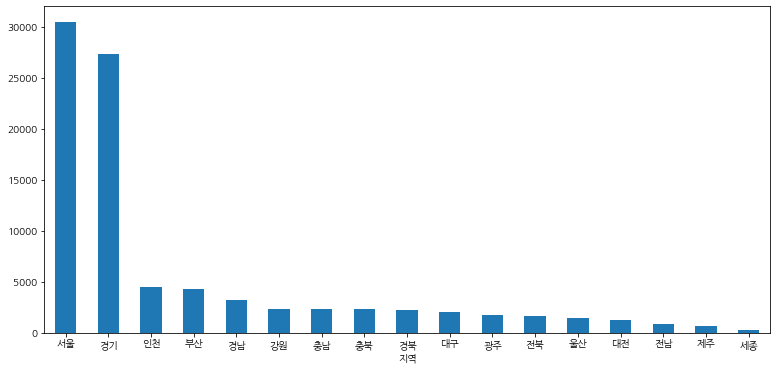

In [81]:
# 지역별 합계를 정렬한 후에 막대 그래프를 작성한다.

corona_local4.sort_values(ascending=False).plot(kind='bar', figsize=(13, 6), rot=0);